# SeismicArray Demo

This notebook demonstrates how to use the SeismicArray class for array-derived rotation (ADR) computation.


In [1]:
import yaml

from obspy import UTCDateTime
from sixdegrees.seismicarray import seismicarray


## 1. Create Configuration File

First, let's create a YAML configuration file for our seismic array.


In [2]:
config = {
    # specify fdsn client
    'fdsn_client': 'IRIS',

    # specify stations
    'stations': [
        'PY.PFOIX',
        'PY.BPH01',
        'PY.BPH02',
        'PY.BPH03',
        'PY.BPH04',
        'PY.BPH05',
        'PY.BPH06',
        'PY.BPH07',
        'PY.BPH08',
        'PY.BPH09',
        'PY.BPH10',
        'PY.BPH11',
        'PY.BPH12',
        'PY.BPH13',
    ],
    
    # specify reference station
    'reference_station': 'PY.PFOIX',
    
    # specify channel prefix
    'channel_prefix': 'B',  # Broadband channels
    
    # specify response output
    'response_output': 'VEL',  # Output velocity (VEL, DISP, ACC)
    
    # specify ADR parameters
    'vp': 6200,  # P-wave velocity in m/s
    'vs': 3700,  # S-wave velocity in m/s
    'sigmau': 1e-9  # Uncertainty in displacement
}

# Save configuration to file
with open('./config/array_config.yml', 'w') as f:
    yaml.dump(config, f)


## 2. Initialize SeismicArray

Now we can create a SeismicArray instance using our configuration.


In [3]:
# setup array instance
array = seismicarray('./config/array_config.yml')

# Show array configuration
array.show_array_info()


├── stations: ['PY.PFOIX', 'PY.BPH01', 'PY.BPH02', 'PY.BPH03', 'PY.BPH04', 'PY.BPH05', 'PY.BPH06', 'PY.BPH07', 'PY.BPH08', 'PY.BPH09', 'PY.BPH10', 'PY.BPH11', 'PY.BPH12', 'PY.BPH13']
├── reference_station: PY.PFOIX
├── channel_prefix: B
├── channel_prefixes: ['B']
├── channel_prefix_mapping
        │   ├── PY.PFOIX: B
        │   ├── PY.BPH01: B
        │   ├── PY.BPH02: B
        │   ├── PY.BPH03: B
        │   ├── PY.BPH04: B
        │   ├── PY.BPH05: B
        │   ├── PY.BPH06: B
        │   ├── PY.BPH07: B
        │   ├── PY.BPH08: B
        │   ├── PY.BPH09: B
        │   ├── PY.BPH10: B
        │   ├── PY.BPH11: B
        │   ├── PY.BPH12: B
        │   └── PY.BPH13: B
├── response_output: VEL
├── fdsn_clients: ['IRIS']
├── client_mapping
        │   ├── PY.PFOIX: IRIS
        │   ├── PY.BPH01: IRIS
        │   ├── PY.BPH02: IRIS
        │   ├── PY.BPH03: IRIS
        │   ├── PY.BPH04: IRIS
        │   ├── PY.BPH05: IRIS
        │   ├── PY.BPH06: IRIS
        │   ├── PY.BPH07: IR

## 3. Get Station Inventories

Fetch station metadata and compute inter-station distances.


In [4]:
# Define time window
tbeg = UTCDateTime("2025-07-29 23:30:00")
tend = UTCDateTime("2025-07-30 00:30:00")

# Get inventories
array.request_inventories(tbeg, tend)

# Compute distances
array.compute_station_distances()


In [5]:
array.show_array_info()

├── stations: ['PY.PFOIX', 'PY.BPH01', 'PY.BPH02', 'PY.BPH03', 'PY.BPH04', 'PY.BPH05', 'PY.BPH06', 'PY.BPH07', 'PY.BPH08', 'PY.BPH09', 'PY.BPH10', 'PY.BPH11', 'PY.BPH12', 'PY.BPH13']
├── reference_station: PY.PFOIX
├── channel_prefix: B
├── channel_prefixes: ['B']
├── channel_prefix_mapping
        │   ├── PY.PFOIX: B
        │   ├── PY.BPH01: B
        │   ├── PY.BPH02: B
        │   ├── PY.BPH03: B
        │   ├── PY.BPH04: B
        │   ├── PY.BPH05: B
        │   ├── PY.BPH06: B
        │   ├── PY.BPH07: B
        │   ├── PY.BPH08: B
        │   ├── PY.BPH09: B
        │   ├── PY.BPH10: B
        │   ├── PY.BPH11: B
        │   ├── PY.BPH12: B
        │   └── PY.BPH13: B
├── response_output: VEL
├── fdsn_clients: ['IRIS']
├── client_mapping
        │   ├── PY.PFOIX: IRIS
        │   ├── PY.BPH01: IRIS
        │   ├── PY.BPH02: IRIS
        │   ├── PY.BPH03: IRIS
        │   ├── PY.BPH04: IRIS
        │   ├── PY.BPH05: IRIS
        │   ├── PY.BPH06: IRIS
        │   ├── PY.BPH07: IR

## 4. Get and Process Waveforms


processing to be applied:  
 response: True 
 rotate: to ZNE 
 detrend: True 
 taper: True 
 filter: True
--------------------
requesting waveforms for station PY.PFOIX using IRIS (prefix: B)
 -> successfully obtained waveforms for PY.PFOIX using IRIS (prefix: B)
--------------------
requesting waveforms for station PY.BPH01 using IRIS (prefix: B)
 -> successfully obtained waveforms for PY.BPH01 using IRIS (prefix: B)
--------------------
requesting waveforms for station PY.BPH02 using IRIS (prefix: B)
 -> successfully obtained waveforms for PY.BPH02 using IRIS (prefix: B)
--------------------
requesting waveforms for station PY.BPH03 using IRIS (prefix: B)
 -> successfully obtained waveforms for PY.BPH03 using IRIS (prefix: B)
--------------------
requesting waveforms for station PY.BPH04 using IRIS (prefix: B)
 -> failed with mapped prefix B: No data available for request.
HTTP Status code: 204
Detailed response of server:


 -> dropping station PY.BPH04: Failed to get waveforms from

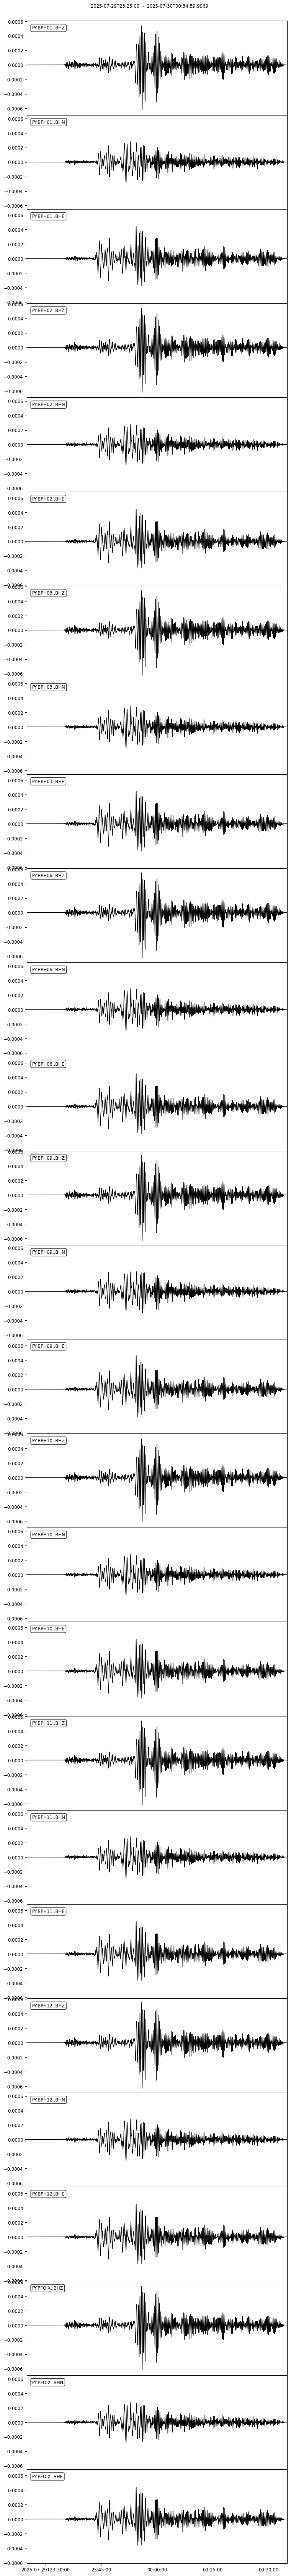

In [6]:
# Get waveforms with preprocessing
stream = array.request_waveforms(
    tbeg,
    tend,
    remove_response=True,
    detrend=True,
    taper=True,
    filter_params={'type': 'bandpass', 'freqmin': 0.01, 'freqmax': 0.5, 'corners': 4, 'zerophase': True},
    verbose=True
)

# Plot the waveforms
stream.plot();


In [7]:
array.show_array_info()

├── stations: ['PY.PFOIX', 'PY.BPH01', 'PY.BPH02', 'PY.BPH03', 'PY.BPH06', 'PY.BPH09', 'PY.BPH10', 'PY.BPH11', 'PY.BPH12']
├── reference_station: PY.PFOIX
├── channel_prefix: B
├── channel_prefixes: ['B']
├── channel_prefix_mapping
        │   ├── PY.PFOIX: B
        │   ├── PY.BPH01: B
        │   ├── PY.BPH02: B
        │   ├── PY.BPH03: B
        │   ├── PY.BPH06: B
        │   ├── PY.BPH09: B
        │   ├── PY.BPH10: B
        │   ├── PY.BPH11: B
        │   └── PY.BPH12: B
├── response_output: VEL
├── fdsn_clients: ['IRIS']
├── client_mapping
        │   ├── PY.PFOIX: IRIS
        │   ├── PY.BPH01: IRIS
        │   ├── PY.BPH02: IRIS
        │   ├── PY.BPH03: IRIS
        │   ├── PY.BPH06: IRIS
        │   ├── PY.BPH09: IRIS
        │   ├── PY.BPH10: IRIS
        │   ├── PY.BPH11: IRIS
        │   └── PY.BPH12: IRIS
├── adr_parameters
        │   ├── vp: 6200.0
        │   ├── vs: 3700.0
        │   └── sigmau: 1e-09
├── station_coordinates
        │   ├── PY.PFOIX
              

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


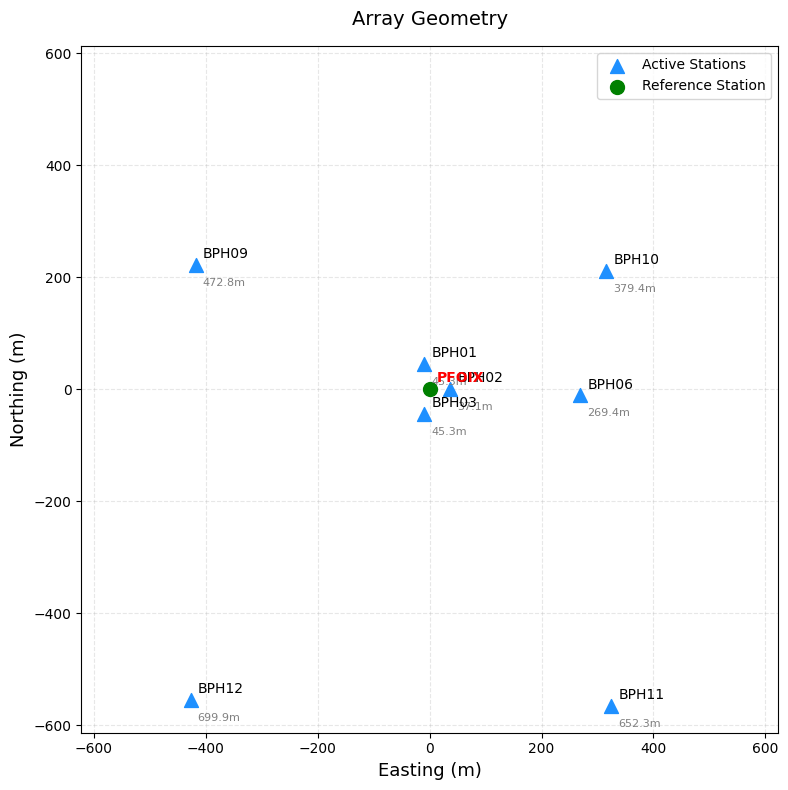

In [8]:
array.plot_array_geometry(
    show_dropped=True,
    # save_path='./figures/array_geometry.png'
    )

## 5. Compute Array-Derived Rotation


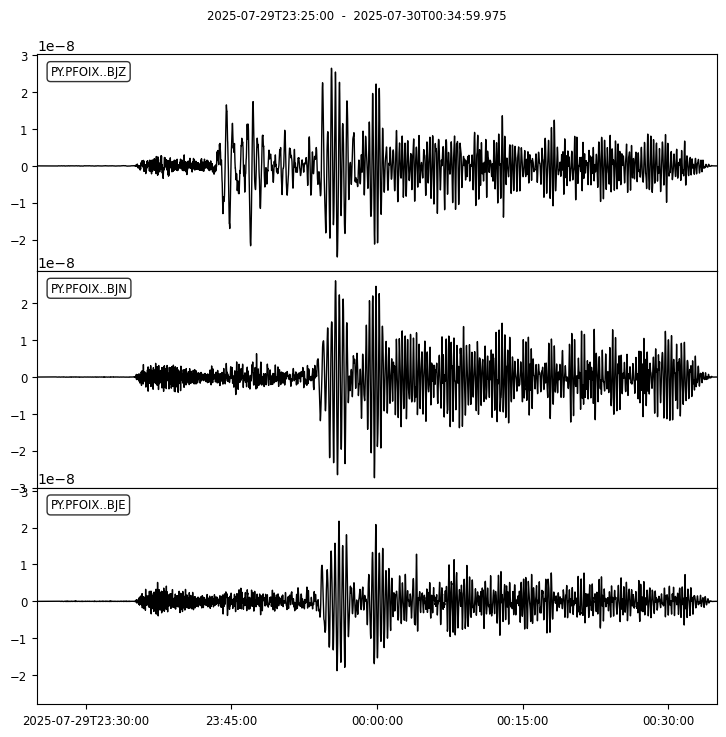

In [9]:
# Compute ADR
rot_stream = array.compute_adr(output=True)

# Plot rotation rates
rot_stream.plot();


## 6. Save 6 Degrees of Freedom Data


The 6-DoF stream can be saved as a mseed file or to a SDS file system.

In [10]:
# Save as MiniSEED file
array.save_6dof_data(
    output_format='file', # 'file' or 'sds'
    output_path='./data/',
    output_file='test_adr_data.mseed'
)


/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


Also, a configuration file can be stored, to read the data as a sixdegrees object for analyses.

In [11]:
array.save_config_for_sixdegrees(
    output_path='./config/',
    output_file='config_adr.yml',
)

Configuration saved to config/config_adr.yml
